In [2]:
import pandas as pd
import numpy as np

###  数据清洗

In [2]:
# 缺失值和空值
# NaN：不是数的数
type(np.NaN)
#对象的空值
None

float

In [6]:
#pd.isnull() 判断数据中的是否为空值或缺失值，是空值，则为True
ser1 = pd.Series(["1",23,None,3,np.NaN])
isnull_bool = pd.isnull(ser1)

In [7]:
ser1[isnull_bool]

2    None
4     NaN
dtype: object

In [11]:
#pd.notnull() 判断数据中的是否为空值或缺失值，不是空值，则为True
notnull_bool = pd.notnull(ser1)

In [10]:
#dataframe.dropna() series.dropna() 删除含有空值的列或行
#inplace=True 影响原始的对象
ser1.dropna()

0     1
1    23
3     3
dtype: object

In [12]:
#bool索引也可以删掉空值的数据
ser1[notnull_bool]

0     1
1    23
3     3
dtype: object

In [25]:
df1 = pd.read_excel("./data/employee.xlsx")

In [28]:
# fillna 填充缺失值或空值 value参数指定要填的值
# method="ffill" 前值填充，"bfill" 后值填充
df1["leader_NO"].fillna(method="bfill", inplace=True)

,id,number,name,job,leader_NO,hire_date,salary,bonus,level,department_NO
0,1,E2018010001,吴所为,总经理,E2018010001,2018-01-01,2800,4000.0,9,D2019060001
1,2,E2018070003,李金龙,总经理,E2018010001,2018-07-01,2800,4000.0,8,D2019090001
2,3,E2018060002,王黎明,总经理,E2018010001,2018-06-01,2800,4000.0,8,D2019060002
3,4,E2018020002,龚爱国,总经理,E2018010001,2018-02-01,2800,4000.0,8,D2020010001
4,5,E2019050001,马金花,财务总监,E2018010001,2019-01-01,3800,500.0,6,D2019060011
5,6,E2019050018,李昌贵,财务专员,E2019050001,2019-04-21,2800,800.0,4,D2019060011
6,7,E2019100011,王建国,网络管理员,E2018010001,2019-10-01,3200,NaN,5,D2019060013
7,8,E2019110004,黎锦熙,网络管理员,E2019100011,2019-11-01,3200,NaN,5,D2019060013
8,9,E2020020023,繁茂森,销售专员,E2019060005,2020-02-01,2800,0.0,4,D2019060014
9,10,E2019060005,张善民,销售经理,E2018010001,2019-06-01,2800,500.0,6,D2019060014


In [18]:
df1.dropna(inplace=True)

In [ ]:
# duplicated()判断重置值
# drop_duplicates() 删除重复值的行

In [32]:
df2 = pd.read_excel("./data/department.xlsx")

In [38]:
# 默认所有列的数据重复，才认定为重复
# 可以通过subset参数指定重复数据的依据（那些列来决定该记录是重复的）
# keep参数 first last False
df2.duplicated(subset=["id"],keep=False)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
dtype: bool

In [39]:
#删除重复列
#inplace=True 直接操作dataframe对象
#keep=False 都是重复，一个不要 
df2.drop_duplicates(subset=["id"],keep=False)

,id,number,name,location,super_NO
0,1,D2019050001,清华集团,北京,NaN
1,2,D2019050002,集团总部,北京,D2019050001
2,3,D2019060001,成都中心,成都,D2019050001
3,4,D2019060002,武汉中心,武汉,D2019050001
4,5,D2019090001,上海中心,上海,D2019050001
5,6,D2020010001,广州中心,广州,D2019050001
6,7,D2019090011,财务部,上海,D2019090001
7,8,D2020020012,行政部,上海,D2019090001
8,9,D2019060011,财务部,成都,D2019060001
9,10,D2019060012,技术部,成都,D2019060001


In [25]:
#异常值的判断处理
df1= pd.DataFrame({"A":[11,21,13,4,14,5,3,3,5,6,7,83,4,3,33,4,78,4],"B":[1,4,3,4,4,5,3,3,5,6,7,13,4,3,33,4,4,7]})

In [6]:
#3sigma检测法
# 如果说一组数据符合正态分布，那么这组数中小于期望值-3*标准差或大于期望值+3*标准差的数，可以认为是异常值
# 写一个方法用作检测异常值，传入一组数（series），返回异常值（可能多个，series）
def three_sigma(series):
    #求这组数平均值
    mean_value = series.mean()
    #求这组数标准差
    std_value = series.std()
    #小于期望值-3*标准差或大于期望值+3*标准差
    bool_series = (series < (mean_value-3*std_value)) | (series > (mean_value+3*std_value))
    # 返回异常值
    return series[bool_series]
# 测试df1的A列数据
three_sigma(df1["A"])

16    678
Name: A, dtype: int64

In [9]:
# 测试df1的B列数据
three_sigma(df1["B"])

Series([], Name: B, dtype: int64)

<AxesSubplot:>

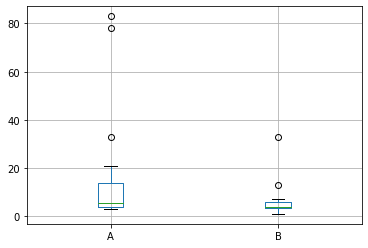

In [14]:
#箱型图检测法
df1.boxplot()

In [26]:
#异常值修正
# replace方法， to_peplace指定被替换的值，value指定替换后的值, 在原有的df上替换使用inplace=True
df1.replace(to_replace=83,value=df1["A"].mean(), inplace=True)

In [27]:
df1

,A,B
0,11.000000,1
1,21.000000,4
2,13.000000,3
3,4.000000,4
4,14.000000,4
5,5.000000,5
6,3.000000,3
7,3.000000,3
8,5.000000,5
9,6.000000,6


In [21]:
# 转换数据类型 astype
df1["A"]= df1["A"].astype(np.int64)

In [35]:
# to_numeric函数将series转成数
pd.to_numeric(df1["A"])

0     11.0
1     21.0
2     13.0
3      4.0
4     14.0
5      5.0
6      3.0
7      3.0
8      5.0
9      6.0
10     7.0
11    16.0
12     4.0
13     3.0
14    33.0
15     4.0
16    78.0
17     4.0
Name: A, dtype: float64

### 数据合并

In [85]:
# 将多个dataframe的数据进行合并
#pd.concat
df1 = pd.DataFrame({"A":[1,2,3],"B":[4,5,6]},index=[1,2,3])
df2 = pd.DataFrame({"C":[2,1,3],"D":[1,5,6]},index=[1,4,5])

In [50]:
# join="inner" 内连接 join="outer" 
# 外连接 axis=0，合并列， axis=1，合并行
#堆叠式
pd.concat([df1,df2],axis=1)

,A,B,C,D
1,1.0,4.0,2.0,1.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,1.0,5.0
5,NaN,NaN,3.0,6.0


In [59]:
#类比数据库多表查询
# 拿雇员和部门表的信息
employee_df = pd.read_excel("./data/employee.xlsx")
department_df = pd.read_excel("./data/department.xlsx")


In [69]:
#可以弄坏一个员工的department_NO数据
employee_df["department_NO"][15] = "E2019060012"

'E2019060012'

In [72]:
# 联表查询
# 所有员工数据，含对相应部门信息
# left=左表，right=右表， left_on指定连接条件中左表的列，right_on指定连接条件中右表的列
# how指定连接方式 inner 内连接， left 左连接 right右连接，outer,全外连接
pd.merge(employee_df,department_df,left_on="department_NO",right_on="number", how="outer")

,id_x,number_x,name_x,job,leader_NO,hire_date,salary,bonus,level,department_NO,id_y,number_y,name_y,location,super_NO
0,1.0,E2018010001,吴所为,总经理,NaN,2018-01-01,2800.0,4000.0,9.0,D2019060001,3.0,D2019060001,成都中心,成都,D2019050001
1,2.0,E2018070003,李金龙,总经理,NaN,2018-07-01,2800.0,4000.0,8.0,D2019090001,5.0,D2019090001,上海中心,上海,D2019050001
2,14.0,E2019120015,李意,行政专员,E2018070003,2019-12-20,2800.0,500.0,4.0,D2019090001,5.0,D2019090001,上海中心,上海,D2019050001
3,3.0,E2018060002,王黎明,总经理,NaN,2018-06-01,2800.0,4000.0,8.0,D2019060002,4.0,D2019060002,武汉中心,武汉,D2019050001
4,4.0,E2018020002,龚爱国,总经理,NaN,2018-02-01,2800.0,4000.0,8.0,D2020010001,6.0,D2020010001,广州中心,广州,D2019050001
5,5.0,E2019050001,马金花,财务总监,E2018010001,2019-01-01,3800.0,500.0,6.0,D2019060011,9.0,D2019060011,财务部,成都,D2019060001
6,6.0,E2019050018,李昌贵,财务专员,E2019050001,2019-04-21,2800.0,800.0,4.0,D2019060011,9.0,D2019060011,财务部,成都,D2019060001
7,7.0,E2019100011,王建国,网络管理员,E2018010001,2019-10-01,3200.0,NaN,5.0,D2019060013,11.0,D2019060013,网络部,成都,D2019060001
8,8.0,E2019110004,黎锦熙,网络管理员,E2019100011,2019-11-01,3200.0,NaN,5.0,D2019060013,11.0,D2019060013,网络部,成都,D2019060001
9,9.0,E2020020023,繁茂森,销售专员,E2019060005,2020-02-01,2800.0,0.0,4.0,D2019060014,12.0,D2019060014,市场部,成都,D2019060001


In [73]:
# 练习，在员工df表中，增加一列，领导列，显示领导姓名
# 创一个领导表
leader_df = employee_df[["number","name"]]

In [78]:
# 查询出了所有员工和对应的领导信息
employee_leader = pd.merge(employee_df, leader_df, left_on="leader_NO",right_on="number", how="left")

In [79]:
employee_leader

,id,number_x,name_x,job,leader_NO,hire_date,salary,bonus,level,department_NO,number_y,name_y
0,1,E2018010001,吴所为,总经理,NaN,2018-01-01,2800,4000.0,9,D2019060001,NaN,NaN
1,2,E2018070003,李金龙,总经理,NaN,2018-07-01,2800,4000.0,8,D2019090001,NaN,NaN
2,3,E2018060002,王黎明,总经理,NaN,2018-06-01,2800,4000.0,8,D2019060002,NaN,NaN
3,4,E2018020002,龚爱国,总经理,NaN,2018-02-01,2800,4000.0,8,D2020010001,NaN,NaN
4,5,E2019050001,马金花,财务总监,E2018010001,2019-01-01,3800,500.0,6,D2019060011,E2018010001,吴所为
5,6,E2019050018,李昌贵,财务专员,E2019050001,2019-04-21,2800,800.0,4,D2019060011,E2019050001,马金花
6,7,E2019100011,王建国,网络管理员,E2018010001,2019-10-01,3200,NaN,5,D2019060013,E2018010001,吴所为
7,8,E2019110004,黎锦熙,网络管理员,E2019100011,2019-11-01,3200,NaN,5,D2019060013,E2019100011,王建国
8,9,E2020020023,繁茂森,销售专员,E2019060005,2020-02-01,2800,0.0,4,D2019060014,E2019060005,张善民
9,10,E2019060005,张善民,销售经理,E2018010001,2019-06-01,2800,500.0,6,D2019060014,E2018010001,吴所为


In [81]:
#修改列名函数，dataframe.rename
# columns指定如何修改列索引label，使用一个dict，key为原列名，值为新列名
# inplace=True指在原dataframe上修改
employee_leader.rename(columns={"number_x":"编号","name_x":"员工姓名","name_y":"领导姓名"}, inplace=True)

In [83]:
# 删除重复的领导编号列 在原employee_leader上删列
del employee_leader["number_y"]

In [84]:
employee_leader

,id,编号,员工姓名,job,leader_NO,hire_date,salary,bonus,level,department_NO,领导姓名
0,1,E2018010001,吴所为,总经理,NaN,2018-01-01,2800,4000.0,9,D2019060001,NaN
1,2,E2018070003,李金龙,总经理,NaN,2018-07-01,2800,4000.0,8,D2019090001,NaN
2,3,E2018060002,王黎明,总经理,NaN,2018-06-01,2800,4000.0,8,D2019060002,NaN
3,4,E2018020002,龚爱国,总经理,NaN,2018-02-01,2800,4000.0,8,D2020010001,NaN
4,5,E2019050001,马金花,财务总监,E2018010001,2019-01-01,3800,500.0,6,D2019060011,吴所为
5,6,E2019050018,李昌贵,财务专员,E2019050001,2019-04-21,2800,800.0,4,D2019060011,马金花
6,7,E2019100011,王建国,网络管理员,E2018010001,2019-10-01,3200,NaN,5,D2019060013,吴所为
7,8,E2019110004,黎锦熙,网络管理员,E2019100011,2019-11-01,3200,NaN,5,D2019060013,王建国
8,9,E2020020023,繁茂森,销售专员,E2019060005,2020-02-01,2800,0.0,4,D2019060014,张善民
9,10,E2019060005,张善民,销售经理,E2018010001,2019-06-01,2800,500.0,6,D2019060014,吴所为


In [91]:
#dataframe.join 默认根据行索引匹配两表
# how指定连接方式，inner left right outer
# on可以指定左表的某列，来匹配右表的行索引
df1.join(df2,how="outer")

,A,B,C,D
1,1.0,4.0,2.0,1.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,1.0,5.0
5,NaN,NaN,3.0,6.0


In [95]:
# 将领导表的number列修改为行索引
leader_new_df = leader_df.set_index("number")

In [99]:
# 重命名新领导表的name列，原因在于join方法不能有同名的列
leader_new_df.rename(columns={"name":"领导姓名"},inplace=True)

In [100]:
#使用join也做到了合并员工和领导表
employee_df.join(leader_new_df, on="leader_NO",how="left")

,id,number,name,job,leader_NO,hire_date,salary,bonus,level,department_NO,领导姓名
0,1,E2018010001,吴所为,总经理,NaN,2018-01-01,2800,4000.0,9,D2019060001,NaN
1,2,E2018070003,李金龙,总经理,NaN,2018-07-01,2800,4000.0,8,D2019090001,NaN
2,3,E2018060002,王黎明,总经理,NaN,2018-06-01,2800,4000.0,8,D2019060002,NaN
3,4,E2018020002,龚爱国,总经理,NaN,2018-02-01,2800,4000.0,8,D2020010001,NaN
4,5,E2019050001,马金花,财务总监,E2018010001,2019-01-01,3800,500.0,6,D2019060011,吴所为
5,6,E2019050018,李昌贵,财务专员,E2019050001,2019-04-21,2800,800.0,4,D2019060011,马金花
6,7,E2019100011,王建国,网络管理员,E2018010001,2019-10-01,3200,NaN,5,D2019060013,吴所为
7,8,E2019110004,黎锦熙,网络管理员,E2019100011,2019-11-01,3200,NaN,5,D2019060013,王建国
8,9,E2020020023,繁茂森,销售专员,E2019060005,2020-02-01,2800,0.0,4,D2019060014,张善民
9,10,E2019060005,张善民,销售经理,E2018010001,2019-06-01,2800,500.0,6,D2019060014,吴所为


### 数据重朔

In [105]:
# dataframe.stack()，和dataframe.unstack()
# 将（最内层）列索引转变成内层行索引，必然会产生一个多层的行索引
df1.stack()

1  A    1
   B    4
2  A    2
   B    5
3  A    3
   B    6
dtype: int64

In [104]:
df1.stack()

,A,B
1,1,4
2,2,5
3,3,6


In [103]:
# 把原有内层行索引变成内层的列索引，新产生了多层的列索引
df1.unstack()

A  1    1
   2    2
   3    3
B  1    4
   2    5
   3    6
dtype: int64

In [108]:
#拿四川高考分数表
score_df = pd.read_excel("./data/scores.xlsx", header=[0,1],index_col=0)

In [113]:
score_df

一本分数线      二本分数线     
        文科   理科    文科   理科
2017   553  511   470  436
2010   543  512   483  441
2019   540  547   472  459
2011   533  519   473  448
2012   516  518   454  445
2016   540  532   480  453
2020   527  529   459  443
2018   553  546   492  458
2013   567  562   505  492
2015   543  528   473  445
2014   551  540   500  475

In [114]:
#对于多层索引，使用level指定想要旋转的索引的层次
# level=0指定操作的最外层索引
score_df.stack(level=0).unstack(level=0)

文科                                               ...   理科            \
      2010 2011 2012 2013 2014 2015 2016 2017 2018 2019  ... 2011 2012 2013   
一本分数线  543  533  516  567  551  543  540  553  553  540  ...  519  518  562   
二本分数线  483  473  454  505  500  473  480  470  492  472  ...  448  445  492   

                                          
      2014 2015 2016 2017 2018 2019 2020  
一本分数线  540  528  532  511  546  547  529  
二本分数线  475  445  453  436  458  459  443  

[2 rows x 22 columns]

### 数据离散化

In [116]:
# 对身高来讲，分为矮，较矮，中等，较高，高5个类别
height = [160,170,180,190,158,172,184,190,162,172,185,166,162,170,180,150]
#使用一个列表来定义区间
height_bins = [0,160,167,173,180,240]
height_ser = pd.Series(height)

In [118]:
#对身高这组数据离散化，使用cut方法
categories = pd.cut(height_ser,bins=height_bins)

In [125]:
#给员工表增加身高列
employee_df["height"] = categories

In [134]:
#employee_df
# 哑变量，（one-hot编码）
# pd.get_dummies columns指定一个列表，其中将某列进行one-hot编码
dummies_df = pd.get_dummies(employee_df,columns=["height"])

In [135]:
#可以重命名哑变量列的名称，增加可读性
dummies_df.rename(columns={"height_(0, 160]":"矮","height_(160, 167]":"较矮", "height_(167, 173]":"中等身材","height_(173, 180]":"较高","height_(180, 240]":"高"})
#后续可以继续统计哑变量列

,id,number,name,job,leader_NO,hire_date,salary,bonus,level,department_NO,矮,较矮,中等身材,较高,高
0,1,E2018010001,吴所为,总经理,NaN,2018-01-01,2800,4000.0,9,D2019060001,1,0,0,0,0
1,2,E2018070003,李金龙,总经理,NaN,2018-07-01,2800,4000.0,8,D2019090001,0,0,1,0,0
2,3,E2018060002,王黎明,总经理,NaN,2018-06-01,2800,4000.0,8,D2019060002,0,0,0,1,0
3,4,E2018020002,龚爱国,总经理,NaN,2018-02-01,2800,4000.0,8,D2020010001,0,0,0,0,1
4,5,E2019050001,马金花,财务总监,E2018010001,2019-01-01,3800,500.0,6,D2019060011,1,0,0,0,0
5,6,E2019050018,李昌贵,财务专员,E2019050001,2019-04-21,2800,800.0,4,D2019060011,0,0,1,0,0
6,7,E2019100011,王建国,网络管理员,E2018010001,2019-10-01,3200,NaN,5,D2019060013,0,0,0,0,1
7,8,E2019110004,黎锦熙,网络管理员,E2019100011,2019-11-01,3200,NaN,5,D2019060013,0,0,0,0,1
8,9,E2020020023,繁茂森,销售专员,E2019060005,2020-02-01,2800,0.0,4,D2019060014,0,1,0,0,0
9,10,E2019060005,张善民,销售经理,E2018010001,2019-06-01,2800,500.0,6,D2019060014,0,0,1,0,0
